### Cargamos el embedding

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

DATA_PATH = "csvs/gnn_chess_embeddings.csv"

data = pd.read_csv(DATA_PATH)
print(f"Shape original: {data.shape}")

data = data.dropna()
print(f"Shape después de dropna: {data.shape}")

data.head()

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Shape original: (103553, 129)
Shape después de dropna: (103553, 129)


,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_119,dim_120,dim_121,dim_122,dim_123,dim_124,dim_125,dim_126,dim_127,player
0,-0.001411,-0.064434,0.028250,-0.141772,0.180635,-0.244194,0.055972,-0.088756,0.143270,-0.080497,...,-0.238932,0.000726,-0.102040,-0.004762,0.013337,0.038208,0.128781,0.119400,0.175518,Ivanchuk
1,0.102700,-0.089599,-0.002993,0.114539,0.076535,-0.419798,0.147342,-0.083727,-0.142846,-0.017672,...,-0.344497,0.048703,-0.157162,-0.027303,-0.077188,0.066761,0.233527,0.137474,0.049377,Ivanchuk
2,0.111593,-0.036302,0.114331,0.041673,0.064323,-0.139762,0.050172,-0.159818,0.029505,-0.038495,...,-0.215032,0.110379,-0.169988,0.023282,-0.051194,-0.041024,0.192438,0.086312,0.011247,Ivanchuk
3,0.112248,-0.016437,0.054951,0.017878,0.054061,-0.324498,0.202983,-0.095965,-0.029095,0.017215,...,-0.254922,-0.014398,-0.110027,0.007931,0.009961,0.056727,0.208098,0.051234,0.002967,Ivanchuk
4,0.196640,0.108348,0.144962,0.062876,0.346618,-0.570708,0.167086,-0.092920,-0.082223,0.004465,...,-0.512407,-0.043458,-0.290882,0.039270,0.056760,0.076883,0.076687,0.211386,0.038153,Ivanchuk


### Armar vector de embedding

In [8]:
embedding_columns = [f"dim_{i}" for i in range(128)]
data['embedding'] = data[embedding_columns].values.tolist()
X = np.stack(data['embedding'].values)

print("Matriz de embeddings:", X.shape)

Matriz de embeddings: (103553, 128)


### Visualización con UMAP

In [19]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_2d = umap_model.fit_transform(X)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


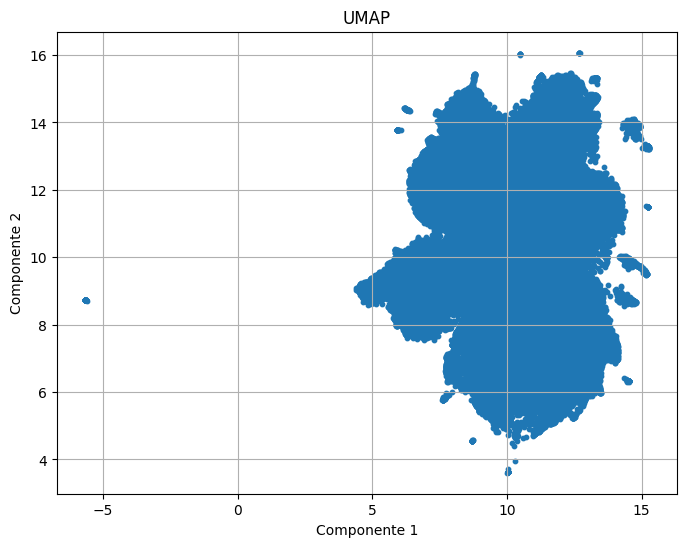

In [21]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_2d = umap_model.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], s=10)
plt.title("UMAP")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)
plt.show()



### Método del codo para elegir `k` en K‑Means

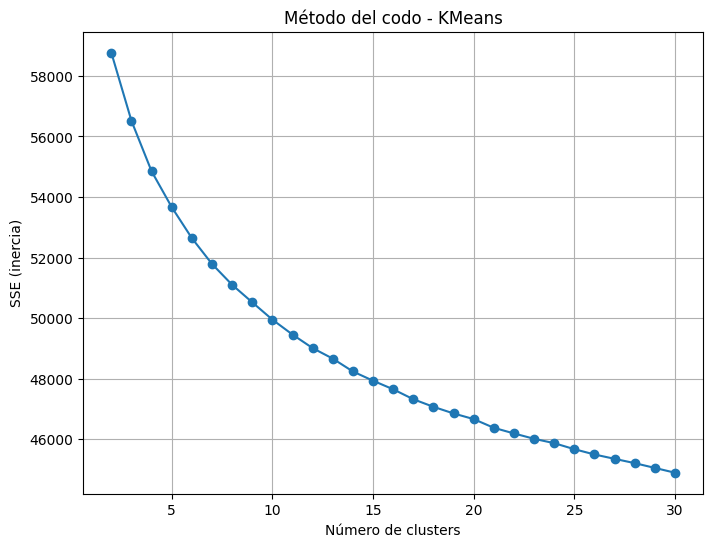

In [17]:
sse = []
K_RANGE = range(2, 31)
for k in K_RANGE:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(list(K_RANGE), sse, marker='o')
plt.title("Método del codo - KMeans")
plt.xlabel("Número de clusters")
plt.ylabel("SSE (inercia)")
plt.grid(True)
plt.show()

### Entrenar K‑Means con `k` óptimo y asignar clusters

In [25]:
OPTIMAL_K = 7
kmeans = KMeans(n_clusters=OPTIMAL_K, random_state=42)
data['cluster'] = kmeans.fit_predict(X)
data[['player', 'cluster']].head()

,player,cluster
0,Ivanchuk,0
1,Ivanchuk,0
2,Ivanchuk,2
3,Ivanchuk,0
4,Ivanchuk,6


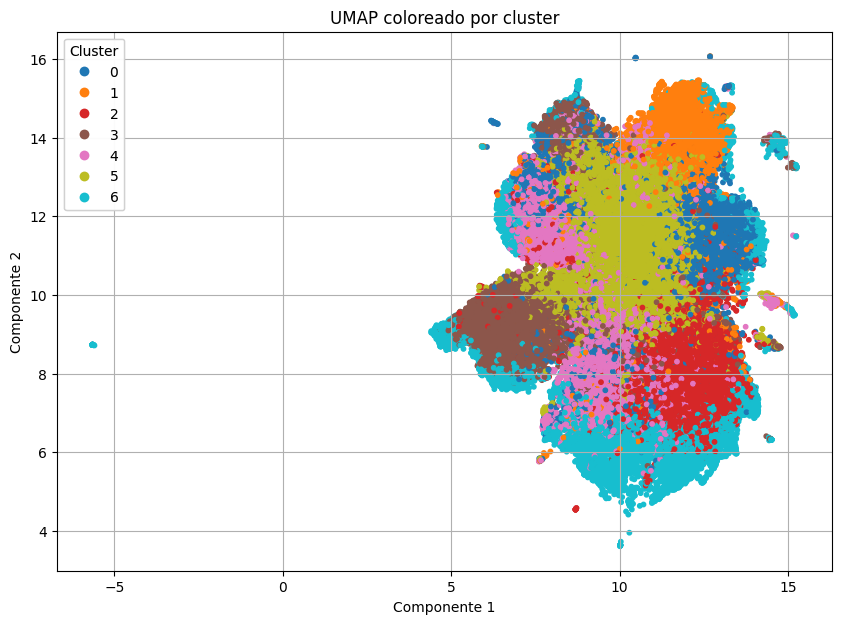

In [26]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=data["cluster"], cmap="tab10", s=10)
plt.title("UMAP coloreado por cluster")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)
legend1 = plt.legend(*scatter.legend_elements(), title="Cluster", loc="best")
plt.gca().add_artist(legend1)
plt.show()

### Evaluación


Evaluando K = 2...
Accuracy para K=2: 14.00%

Evaluando K = 4...
Accuracy para K=4: 36.00%

Evaluando K = 6...
Accuracy para K=6: 60.00%

Evaluando K = 8...
Accuracy para K=8: 66.00%

Evaluando K = 10...
Accuracy para K=10: 70.00%

Evaluando K = 12...
Accuracy para K=12: 82.00%

Evaluando K = 14...
Accuracy para K=14: 76.00%

Evaluando K = 16...
Accuracy para K=16: 76.00%

Evaluando K = 18...
Accuracy para K=18: 68.00%

Evaluando K = 20...
Accuracy para K=20: 78.00%

Evaluando K = 22...
Accuracy para K=22: 80.00%

Evaluando K = 24...
Accuracy para K=24: 80.00%

Evaluando K = 26...
Accuracy para K=26: 86.00%

Evaluando K = 28...
Accuracy para K=28: 84.00%

Evaluando K = 30...
Accuracy para K=30: 86.00%

Evaluando K = 32...
Accuracy para K=32: 84.00%

Evaluando K = 34...
Accuracy para K=34: 84.00%

Evaluando K = 36...
Accuracy para K=36: 80.00%

Evaluando K = 38...
Accuracy para K=38: 80.00%

Evaluando K = 40...
Accuracy para K=40: 82.00%

Evaluando K = 42...
Accuracy para K=42: 74.00%


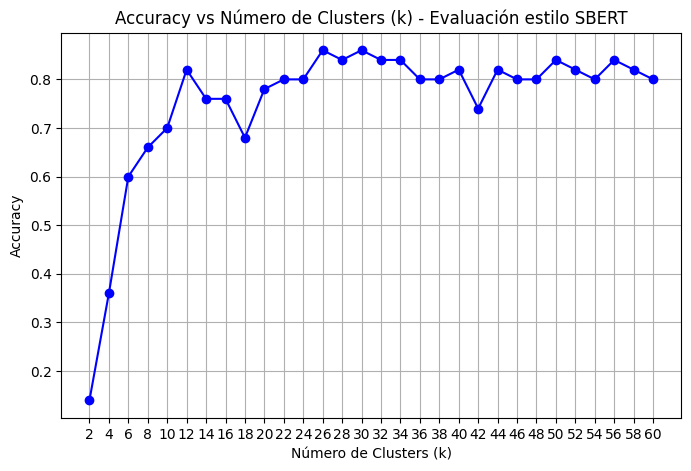

player
Fine               28
Philidor           28
Bogoljubow         24
Capablanca         22
Nimzowitsch        22
Winawer            20
Botvinnik          19
Lasker             15
Chigorin           15
Pillsbury          14
DeLaBourdonnais    14
Reshevsky          13
Zukertort          13
Tarrasch           11
Steinitz           10
Maroczy            10
Staunton            7
Rubinstein          7
Kramnik             7
Alekhine            6
Geller              5
Anderssen           5
Korchnoi            4
Portisch            4
Leko                4
Carlsen             4
Najdorf             3
Aronian             3
Petrosian           3
Euwe                2
Kasparov            2
Ivanchuk            2
Karjakin            2
Karpov              2
Gelfand             2
Schlechter          2
Fischer             2
Keres               2
Anand               2
Morphy              2
Spassky             1
Polugaevsky         1
Bronstein           1
Tal                 1
Kamsky              1
Tim

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def kmeans_player_identification_with_errors_v3(X_train, train_df, X_test, test_df, k_values):
    results = []
    all_errors = []
    accuracies = []

    for k in k_values:
        print(f"\nEvaluando K = {k}...")

        kmeans = KMeans(n_clusters=k, random_state=3633)
        kmeans.fit(X_train)

        # Asignar clusters
        train_df = train_df.copy()
        train_df["cluster"] = kmeans.labels_
        test_labels = kmeans.predict(X_test)
        test_df = test_df.copy()
        test_df["cluster"] = test_labels

        # Distribución de clusters por jugador
        cluster_dist_train = pd.crosstab(train_df["player"], train_df["cluster"], normalize="index")
        cluster_dist_test = pd.crosstab(test_df["player"], test_df["cluster"], normalize="index")

        # Asegurar misma estructura
        cluster_dist_test = cluster_dist_test.reindex(columns=cluster_dist_train.columns, fill_value=0)

        players_train = cluster_dist_train.index.tolist()
        players_test = cluster_dist_test.index.tolist()

        train_vectors = cluster_dist_train.values
        test_vectors = cluster_dist_test.values

        # Comparar vectores
        sim_matrix = cosine_similarity(test_vectors, train_vectors)
        pred_indices = sim_matrix.argmax(axis=1)
        pred_players = [players_train[idx] for idx in pred_indices]

        # Evaluar
        df_compare = pd.DataFrame({
            "player": players_test,
            "pred_player": pred_players
        })
        df_compare["correct"] = df_compare["player"] == df_compare["pred_player"]
        accuracy_global = df_compare["correct"].mean()*100
        accuracies.append(df_compare["correct"].mean())

        print(f"Accuracy para K={k}: {accuracy_global:.2f}%")

        # Mostrar errores
        errors = df_compare[df_compare["correct"] == False].copy()

        # Guardar resultados
        for player, group in df_compare.groupby("player"):
            acc = group["correct"].mean() * 100
            results.append({"k": k, "player": player, "accuracy_%": acc})

        errors["k"] = k
        all_errors.append(errors)

    results_df = pd.DataFrame(results)
    errors_df = pd.concat(all_errors, ignore_index=True)

    return accuracies, results_df, errors_df


y = data["player"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3633, stratify=y)

train_df = pd.DataFrame({"player": y_train})
test_df = pd.DataFrame({"player": y_test})

k_values = list(range(2, 62, 2))
accuracies, df_results, df_errors = kmeans_player_identification_with_errors_v3(X_train, train_df, X_test, test_df, k_values)

# Graficar resultados
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title("Accuracy vs Número de Clusters (k) - Evaluación estilo SBERT")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(k_values)
plt.show()

# Errores por jugador
error_counts = df_errors.groupby("player")["correct"].apply(lambda x: (~x).sum()).sort_values(ascending=False)
error_counts
